In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 62 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,700 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [362]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 79 kB/s 


In [363]:
!pip install ngboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 349 kB 8.2 MB/s 
     |████████████████████████████████| 68 kB 5.1 MB/s 
     |████████████████████████████████| 38.1 MB 61 kB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=30e4707d45f3f373b9dabf7c2143160ae45730033da743197ea22cf3ef5e0e9d
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.2 MB/s 


In [417]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

train_df = pd.read_csv('/content/drive/MyDrive/movies_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/movies_test.csv')
submission = pd.read_csv('/content/drive/MyDrive/submission.csv')

dataset = pd.concat([train_df, test_df], axis = 0).reset_index().drop('index', axis = 1)
dataset

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0
...,...,...,...,...,...,...,...,...,...,...,...,...
838,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2590.00,1,4,4,NaN
839,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2,NaN
840,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4,NaN
841,말하지 못한 비밀,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,50699.00,1,68,7,NaN


In [389]:
plt.rc('font', family='NanumBarunGothic') 


In [390]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [305]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [306]:
train_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [307]:
train_df[train_df['dir_prev_bfnum'].isnull()]['dir_prev_num'].value_counts()


0    330
Name: dir_prev_num, dtype: int64

In [308]:
test_df[test_df['dir_prev_bfnum'].isnull()]['dir_prev_num'].value_counts()

0    136
Name: dir_prev_num, dtype: int64

In [418]:
dataset.fillna(0, inplace = True)

In [419]:
train_df.fillna(0, inplace = True)
test_df.fillna(0, inplace = True)

In [311]:
train_df['title'].nunique()

600

In [312]:
def draw_plot(column, data):
    sns.countplot(y = column, data = data, order = data[column].value_counts().iloc[:10].index)

In [313]:
def draw_kdeplot(column, data):
    sns.kdeplot(x = data[column])

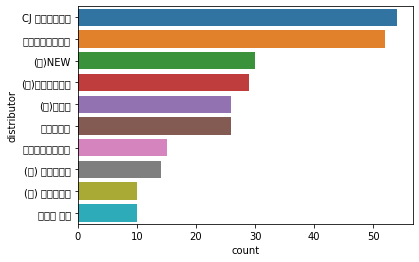

In [193]:
draw_plot('distributor', train_df)

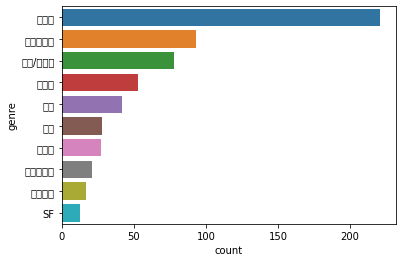

In [194]:
draw_plot('genre', train_df)

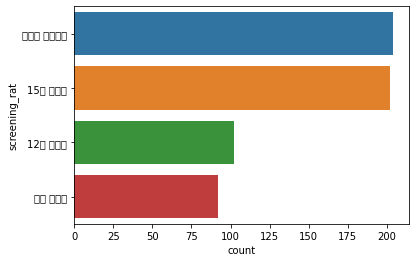

In [195]:
draw_plot('screening_rat', train_df)

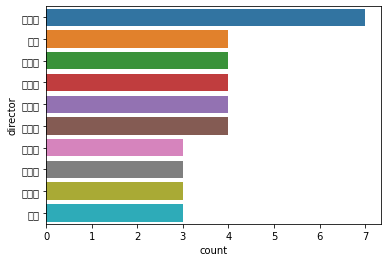

In [196]:
draw_plot('director', train_df)

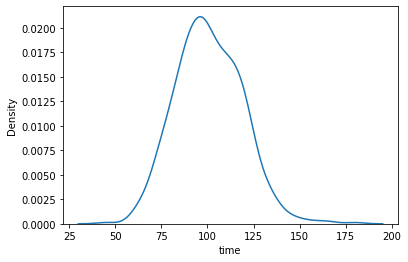

In [197]:
draw_kdeplot('time', train_df)

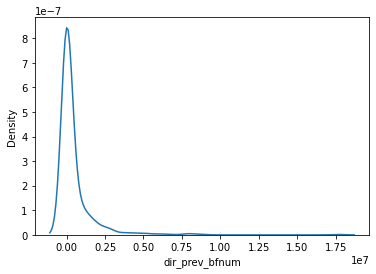

In [198]:
draw_kdeplot('dir_prev_bfnum', train_df)

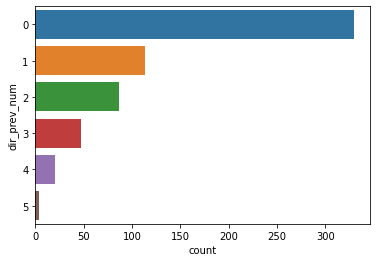

In [199]:
draw_plot('dir_prev_num', train_df)

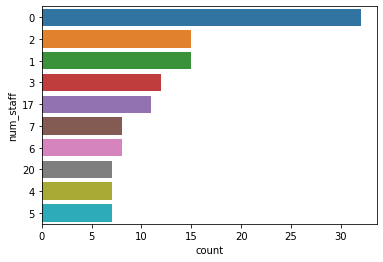

In [200]:
draw_plot('num_staff', train_df)

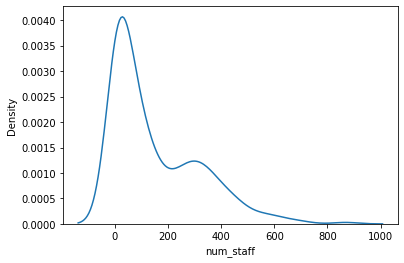

In [201]:
draw_kdeplot('num_staff', train_df)

In [202]:
train_df.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,6.000000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,4.726993e+05,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.309474e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,0.000000e+00,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,0.000000e+00,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,3.761416e+05,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


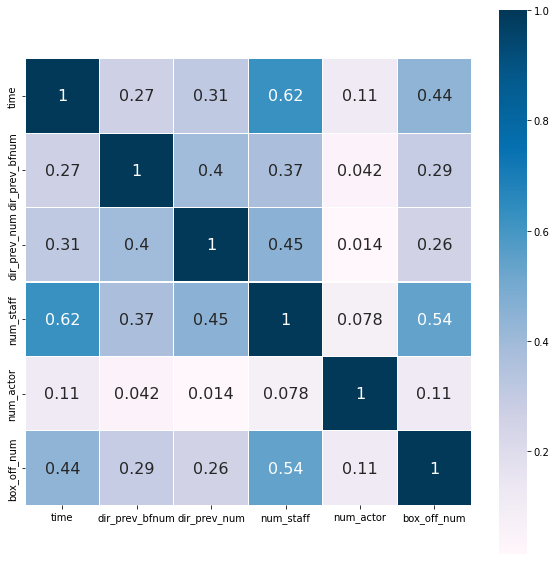

In [203]:
colormap = plt.cm.PuBu

plt.figure(figsize = (10, 10))
numeric_columns = ['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor',
       'box_off_num']
sns.heatmap(train_df[numeric_columns].astype(float).corr(),linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

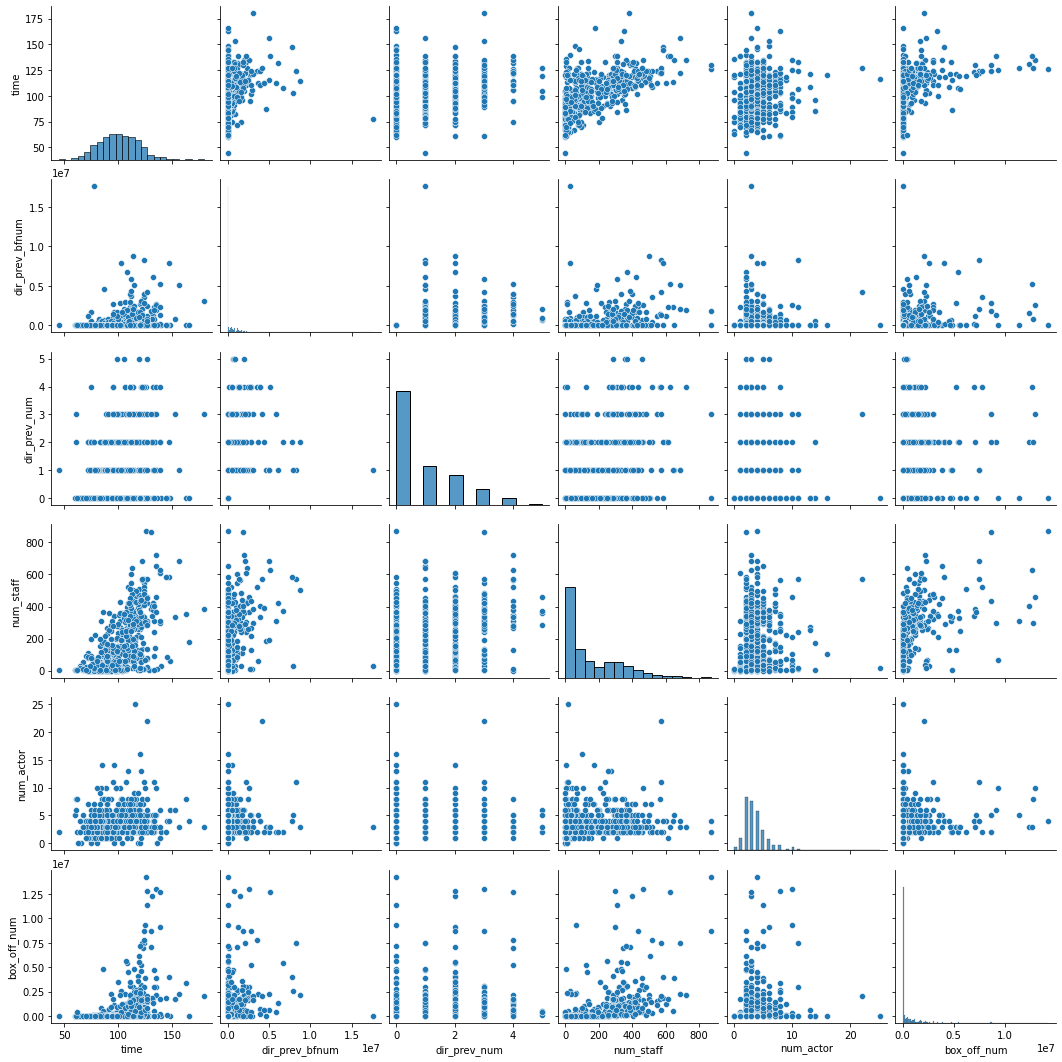

In [204]:
sns.pairplot(train_df[numeric_columns])

In [205]:
train_df[numeric_columns].astype(float).corr()['box_off_num']

time              0.441452
dir_prev_bfnum    0.293791
dir_prev_num      0.259674
num_staff         0.544265
num_actor         0.111179
box_off_num       1.000000
Name: box_off_num, dtype: float64

In [420]:
dataset.drop('title', axis = 1, inplace = True)

In [421]:
train_df.drop('title', axis= 1, inplace = True)
test_df.drop('title', axis = 1, inplace = True)

In [316]:
train_df

,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...
595,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0.00,0,123,4,2475
598,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.00,0,431,4,2192525


In [394]:
train_df.groupby('screening_rat')['box_off_num'].mean()

screening_rat
12세 관람가     8.449809e+05
15세 관람가     1.247519e+06
전체 관람가      1.351005e+05
청소년 관람불가    3.641813e+05
Name: box_off_num, dtype: float64

In [422]:
train_df['year'] = train_df['release_time'].apply(lambda x : x[:4])
test_df['year'] = test_df['release_time'].apply(lambda x : x[:4])
train_df.groupby('year')['box_off_num'].mean()

year
2010    5.416582e+05
2011    6.288671e+05
2012    9.457252e+05
2013    1.007358e+06
2014    5.938845e+05
2015    5.958692e+05
Name: box_off_num, dtype: float64

In [423]:
dataset['year'] = dataset['release_time'].apply(lambda x : x[:4])

In [396]:
train_df.groupby('director')['box_off_num'].mean().sort_values(ascending = False)[:10]

director
윤제균    14262766.0
최동훈    12845252.0
양우석    11374879.0
봉준호     9350351.0
한재림     9135806.0
황동혁     8659725.0
이석훈     8212959.5
김한민     7482180.0
추창민     6986501.0
장철수     6959083.0
Name: box_off_num, dtype: float64

In [397]:
train_df['distributor'].nunique(), train_df['genre'].nunique(), train_df['screening_rat'].nunique(), train_df['director'].nunique()

(169, 12, 4, 472)

In [398]:
dataset['director'].nunique(), train_df['director'].nunique()

(614, 472)

In [323]:
dataset

,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year
0,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398.0,2012
1,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0,2015
2,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0,2013
3,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0,2012
4,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
838,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2590.00,1,4,4,0.0,2015
839,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,0.00,0,18,2,0.0,2015
840,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,0.00,0,224,4,0.0,2015
841,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,50699.00,1,68,7,0.0,2015


In [216]:
train_df.groupby('genre')['box_off_num'].mean().sort_values(ascending = False)

genre
느와르       2.263695e+06
액션        2.203974e+06
SF        1.788346e+06
코미디       1.193914e+06
드라마       6.256898e+05
공포        5.908325e+05
미스터리      5.275482e+05
멜로/로맨스    4.259680e+05
애니메이션     1.819267e+05
서스펜스      8.261100e+04
다큐멘터리     6.717226e+04
뮤지컬       6.627000e+03
Name: box_off_num, dtype: float64

In [217]:
train_df.groupby('genre')['box_off_num'].mean().sort_values(ascending = False)

genre
느와르       2.263695e+06
액션        2.203974e+06
SF        1.788346e+06
코미디       1.193914e+06
드라마       6.256898e+05
공포        5.908325e+05
미스터리      5.275482e+05
멜로/로맨스    4.259680e+05
애니메이션     1.819267e+05
서스펜스      8.261100e+04
다큐멘터리     6.717226e+04
뮤지컬       6.627000e+03
Name: box_off_num, dtype: float64

In [218]:
train_df.groupby('year')['box_off_num'].mean().sort_values(ascending = False)

year
2013    1.007358e+06
2012    9.457252e+05
2011    6.288671e+05
2015    5.958692e+05
2014    5.938845e+05
2010    5.416582e+05
Name: box_off_num, dtype: float64

In [219]:
train_df.groupby('screening_rat')['box_off_num'].mean().sort_values(ascending = False)

screening_rat
15세 관람가     1.247519e+06
12세 관람가     8.449809e+05
청소년 관람불가    3.641813e+05
전체 관람가      1.351005e+05
Name: box_off_num, dtype: float64

In [424]:
genre_encoding = {'느와르' : 12, '액션' : 11, 'SF' : 10, '코미디' : 9, '드라마' : 8, '공포' : 7, '미스터리' : 6,
                  '멜로/로맨스' : 5, '애니메이션' : 4, '서스펜스' : 3, '다큐멘터리' : 2, '뮤지컬' : 1}

screen_encoding = {'15세 관람가' : 4, '12세 관람가' : 3, '청소년 관람불가' : 2, '전체 관람가' : 1}
year_encoding = {'2013' : 6, '2012' : 5, '2011' : 4, '2015' : 3, '2014' : 2, '2010' : 1}

train_df['장르'] = train_df['genre'].map(genre_encoding)
test_df['장르'] = test_df['genre'].map(genre_encoding)

train_df['이용가능연령대'] = train_df['screening_rat'].map(screen_encoding)
test_df['이용가능연령대'] = test_df['screening_rat'].map(screen_encoding)

train_df['년도'] = train_df['year'].map(year_encoding)
test_df['년도'] = test_df['year'].map(year_encoding)

In [425]:
tr_nm_rank = train_df.groupby('distributor').box_off_num.median().reset_index(name = 'num_rank').sort_values(by = 'num_rank')
tr_nm_rank['num_rank'] = [i + 1 for i in range(tr_nm_rank.shape[0])]
tr_nm_rank

,distributor,num_rank
141,인피니티엔터테인먼트,1
65,고구마공작소,2
92,사람과 사람들,3
131,위드시네마,4
68,나우콘텐츠,5
...,...,...
50,CJ E&M 영화부문,165
121,영구아트무비,166
96,쇼박스(주)미디어플렉스,167
27,(주)아이필름코퍼레이션,168


In [426]:
train_df = pd.merge(train_df, tr_nm_rank, how = 'left')
test_df = pd.merge(test_df, tr_nm_rank, how = 'left')
test_df.fillna(0, inplace = True)

In [427]:
test_df.shape, train_df.shape

((243, 15), (600, 16))

In [428]:
train_df.drop(['genre', 'screening_rat', 'year', 'release_time', 'distributor', 'director'], axis = 1, inplace = True)
test_df.drop(['genre', 'screening_rat', 'year', 'release_time', 'distributor', 'director'], axis = 1, inplace = True)

train_df.columns, test_df.columns

(Index(['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor',
        'box_off_num', '장르', '이용가능연령대', '년도', 'num_rank'],
       dtype='object'),
 Index(['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor',
        '장르', '이용가능연령대', '년도', 'num_rank'],
       dtype='object'))

In [404]:
np.corrcoef(train_df['num_actor'], train_df['box_off_num'])

array([[1.        , 0.11117934],
       [0.11117934, 1.        ]])

In [405]:
train_df

,title,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,장르,이용가능연령대,년도,num_rank
0,개들의 전쟁,96,0.00,0,91,2,23398,11,2,5,151
1,내부자들,130,1161602.50,2,387,3,7072501,12,2,3,164
2,은밀하게 위대하게,123,220775.25,4,343,4,6959083,11,4,6,164
3,나는 공무원이다,101,23894.00,2,20,6,217866,9,1,5,158
4,불량남녀,108,1.00,1,251,2,483387,9,4,1,167
...,...,...,...,...,...,...,...,...,...,...,...
595,해무,111,3833.00,1,510,7,1475091,8,2,2,158
596,파파로티,127,496061.00,1,286,6,1716438,8,4,6,164
597,살인의 강,99,0.00,0,123,4,2475,7,2,1,49
598,악의 연대기,102,0.00,0,431,4,2192525,12,4,3,159


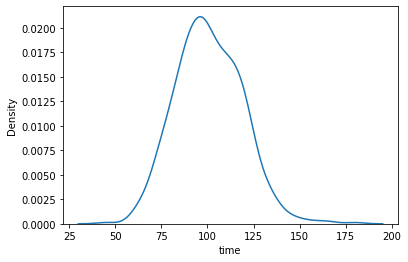

In [224]:
draw_kdeplot('time', train_df)

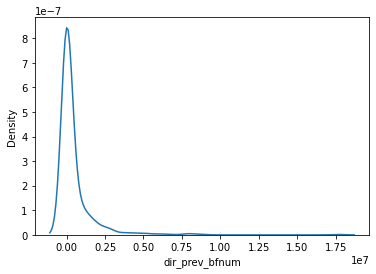

In [225]:
draw_kdeplot('dir_prev_bfnum', train_df)

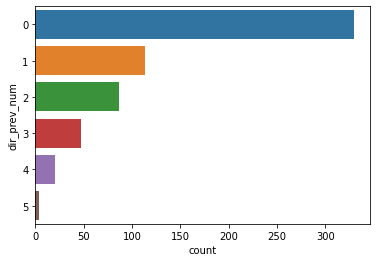

In [226]:
draw_plot('dir_prev_num', train_df)

In [429]:
train_df.loc[train_df['num_actor'] >= 7, 'num_actor'] = 7
train_df['num_actor'].value_counts()

2    154
3    143
4    114
5     58
7     54
1     35
6     33
0      9
Name: num_actor, dtype: int64

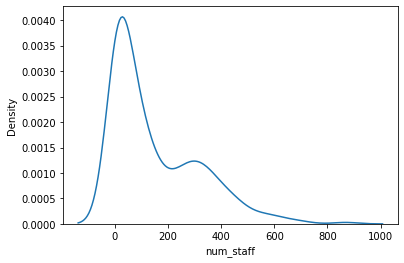

In [228]:
draw_kdeplot('num_staff', train_df)

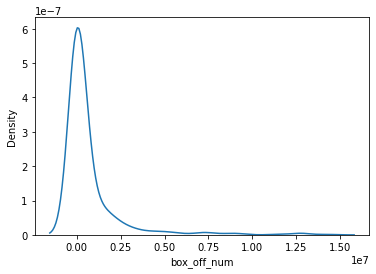

In [229]:
draw_kdeplot('box_off_num', train_df)

In [430]:
train_df['population'] = train_df['dir_prev_bfnum'] * train_df['dir_prev_num']
test_df['population'] = test_df['dir_prev_bfnum'] * test_df['dir_prev_num']

In [431]:
X = train_df.copy()
X_test = test_df.copy()

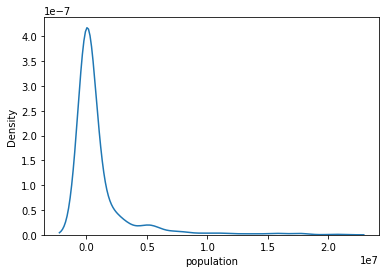

In [432]:
draw_kdeplot('population', train_df)

In [448]:
train_df['num_rank'].value_counts()

159    54
151    52
158    30
49     29
164    26
       ..
150     1
129     1
47      1
8       1
48      1
Name: num_rank, Length: 169, dtype: int64

In [449]:
from sklearn.preprocessing import StandardScaler

standard_columns = ['time', 'num_actor', 'num_rank']
log_columns = ['dir_prev_num', 'dir_prev_bfnum', 'num_staff', 'population']

scaler = StandardScaler()


X[log_columns] = np.log1p(train_df[log_columns])
X[standard_columns] = scaler.fit_transform(train_df[standard_columns])

X_test[['dir_prev_num', 'dir_prev_bfnum', 'num_staff', 'population']] = np.log1p(test_df[['dir_prev_num', 'dir_prev_bfnum', 'num_staff', 'population']])
X_test[standard_columns] = scaler.fit_transform(test_df[standard_columns]) 

In [450]:
X_train = X.drop(['box_off_num', 'dir_prev_num', 'dir_prev_bfnum'], axis = 1)
X_test = X_test.drop(['dir_prev_num', 'dir_prev_bfnum'], axis = 1)
y = X['box_off_num']

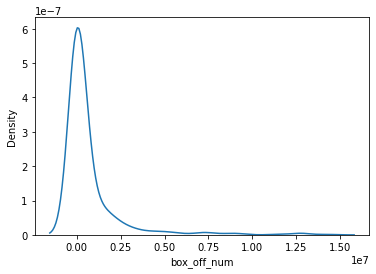

In [451]:
draw_kdeplot('box_off_num', X)

In [452]:
from scipy.stats import skew
print(skew(train_df['num_staff']), skew(X_train['num_staff']))
#print(skew(train_df['box_off_num']), skew(y))
#print(skew(train_df['dir_prev_num']), skew(X_train['dir_prev_num']))
#print(skew(train_df['dir_prev_bfnum']), skew(X_train['dir_prev_bfnum']))
#print(skew(train_df['num_staff']), skew(X_train['num_staff']))
print(skew(train_df['population']), skew(X_train['population']))

1.2303665582484267 -0.704494784252116
3.9944321147621147 0.48139024435898803


In [453]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [413]:
X_train.shape, X_test.shape, y.shape

((600, 8), (243, 8), (600,))

In [130]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.4,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.05,
    'learning_rate': 0.01,
    'max_depth': -1,  
    'metric':'rmse',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective' : 'regression',
    'verbosity': 1
}

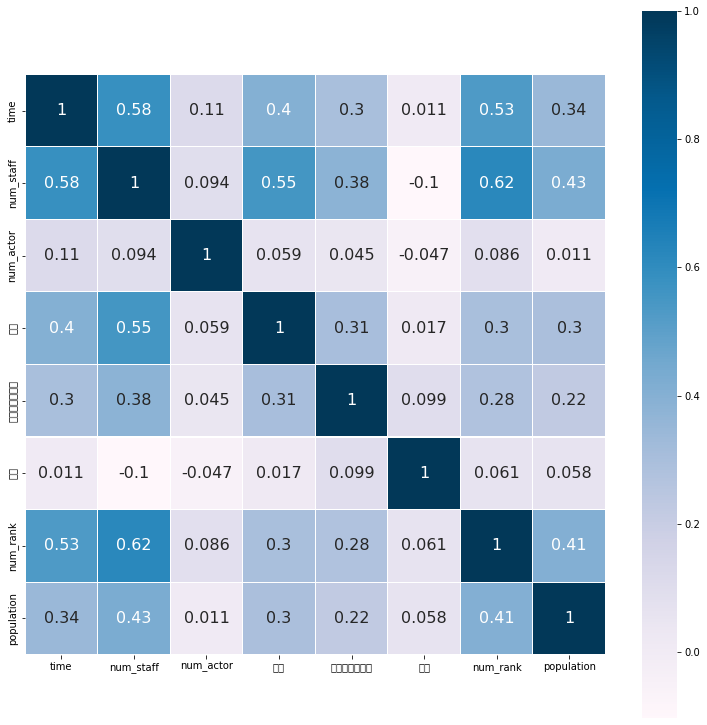

In [350]:
plt.figure(figsize = (13, 13))
sns.heatmap(X_train.astype(float).corr(),linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})


In [351]:
X.head()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,장르,이용가능연령대,년도,num_rank,population
0,-0.268953,0.000000,0.000000,4.521789,-0.698066,10.060449,11,2,5,151,0.000000
1,1.611324,13.965312,1.098612,5.961005,-0.289043,15.771725,12,2,3,164,14.658459
2,1.224208,12.304905,1.609438,5.840642,0.119980,15.755558,11,4,6,164,13.691196
3,0.007558,10.081425,1.098612,3.044522,0.938026,12.291640,9,1,5,158,10.774551
4,0.394674,0.693147,0.693147,5.529429,-0.698066,13.088575,9,4,1,167,0.693147


In [437]:
kf = KFold(n_splits =  10, shuffle = True, random_state = 42)


In [454]:
gbm = GradientBoostingRegressor(n_estimators = 1000, learning_rate = 0.01,
                                max_depth = 12, min_samples_leaf = 8,  random_state = 42)

rmse_list = []
gb_pred = np.zeros((X_test.shape[0]))
for i, (tr_idx, val_idx) in enumerate(kf.split(X_train, y)) :
    tr_x, tr_y = X_train.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y.iloc[val_idx]
    
    gbm.fit(tr_x, tr_y)
    
    pred = np.array([0 if x < 0 else x for x in gbm.predict(val_x)])
    sub_pred = np.array([0 if x < 0 else x for x in gbm.predict(X_test)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    print('Fold : {0}, RMSE : {1:.4f}'.format(i+1, rmse))
    gb_pred += (sub_pred / 10)
print(np.mean(rmse_list), np.std(rmse_list))

Fold : 1, RMSE : 1145256.2717
Fold : 2, RMSE : 1489658.6289
Fold : 3, RMSE : 1315776.8170
Fold : 4, RMSE : 1958713.8267
Fold : 5, RMSE : 965844.1918
Fold : 6, RMSE : 1378414.3397
Fold : 7, RMSE : 2020447.4956
Fold : 8, RMSE : 2146292.5142
Fold : 9, RMSE : 1963623.1567
Fold : 10, RMSE : 1396737.4096
1578076.4651936784 390336.00556445855


In [455]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold

n_splits = 10
sfk = KFold(n_splits = n_splits)
lgbm_pred = np.zeros(len(X_test))

lgbm = LGBMRegressor(n_estimators = 700, learning_rate= 0.01,max_depth = 12, min_samples_leaf = 8 ,objective = 'rmse', random_state = 42)
for i, (tr_idx, val_idx) in enumerate(kf.split(X_train, y)) :
    tr_x, tr_y = X_train.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y.iloc[val_idx]
    
    lgbm.fit(tr_x, tr_y)
    
    pred = np.array([0 if x < 0 else x for x in lgbm.predict(val_x)])
    sub_pred = np.array([0 if x < 0 else x for x in lgbm.predict(X_test)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    print('Fold : {0}, RMSE : {1:.4f}'.format(i+1, rmse))
    lgbm_pred += (sub_pred / 10)
print(np.mean(rmse_list), np.std(rmse_list))

Fold : 1, RMSE : 837320.0291
Fold : 2, RMSE : 1321258.7851
Fold : 3, RMSE : 1388362.8204
Fold : 4, RMSE : 1348435.9395
Fold : 5, RMSE : 855721.9596
Fold : 6, RMSE : 1269759.5907
Fold : 7, RMSE : 1916450.3935
Fold : 8, RMSE : 1897629.0943
Fold : 9, RMSE : 1985693.0399
Fold : 10, RMSE : 1398094.6480
1499974.5475940169 396045.205107707


In [456]:
from sklearn.ensemble import RandomForestRegressor

n_splits = 10
kf = KFold(n_splits = n_splits)

rf = RandomForestRegressor(n_estimators= 700, max_depth = 12, min_samples_leaf = 8, random_state = 42)
rmse_list = []
rf_pred = np.zeros(len(X_test))
for i, (tr_idx, val_idx) in enumerate(kf.split(X_train, y)) :
    tr_x, tr_y = X_train.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y.iloc[val_idx]
    
    rf.fit(tr_x, tr_y)
    
    pred = np.array([0 if x < 0 else x for x in rf.predict(val_x)])
    sub_pred = np.array([0 if x < 0 else x for x in rf.predict(X_test)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    print('Fold : {0}, RMSE : {1:.4f}'.format(i+1, rmse))
    rf_pred += (sub_pred / 10)
print(np.mean(rmse_list), np.std(rmse_list))


Fold : 1, RMSE : 814309.2458
Fold : 2, RMSE : 1133440.8734
Fold : 3, RMSE : 1305224.1211
Fold : 4, RMSE : 996135.0837
Fold : 5, RMSE : 858288.0093
Fold : 6, RMSE : 1249455.0314
Fold : 7, RMSE : 1923197.6563
Fold : 8, RMSE : 1715244.9712
Fold : 9, RMSE : 2117508.9096
Fold : 10, RMSE : 1342181.1898
1345498.509161708 419983.99235584226


In [457]:
from xgboost import XGBRegressor

n_splits = 10
kf = KFold(n_splits = n_splits)

xgb = XGBRegressor(n_estimators= 1000, eta = 0.05, eval_metric = 'rmse', random_state = 42)
rmse_list = []
xgb_pred = np.zeros(len(X_test))
for i, (tr_idx, val_idx) in enumerate(kf.split(X_train, y)) :
    tr_x, tr_y = X_train.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y.iloc[val_idx]
    
    xgb.fit(tr_x, tr_y)
    
    pred = np.array([0 if x < 0 else x for x in xgb.predict(val_x)])
    sub_pred = np.array([0 if x < 0 else x for x in xgb.predict(X_test)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    print('Fold : {0}, RMSE : {1:.4f}'.format(i+1, rmse))
    xgb_pred += (sub_pred / 10)

print(np.mean(rmse_list), np.std(rmse_list))

[07:01:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fold : 1, RMSE : 979770.4176
[07:01:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fold : 2, RMSE : 1420819.0228
[07:01:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fold : 3, RMSE : 1611019.6134
[07:01:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fold : 4, RMSE : 2035689.3886
[07:01:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fold : 5, RMSE : 1046034.2443
[07:01:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fold : 6, RMSE : 1380230.4378
[07:01:28] WARNING: /workspace/src/objective/regression_obj

In [458]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from ngboost import NGBRegressor

In [459]:
ngb = NGBRegressor(random_state = 42)

rmse_list = []
ngb_pred = np.zeros((X_test.shape[0]))
for i, (tr_idx, val_idx) in enumerate(kf.split(X_train, y)) :
    tr_x, tr_y = X_train.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y.iloc[val_idx]
    
    ngb.fit(tr_x, tr_y)
    
    pred = np.array([0 if x < 0 else x for x in ngb.predict(val_x)])
    sub_pred = np.array([0 if x < 0 else x for x in ngb.predict(X_test)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    rmse_list.append(rmse)
    print('Fold : {0}, RMSE : {1:.4f}'.format(i+1, rmse))
    ngb_pred += (sub_pred / 10)

print(np.mean(rmse_list), np.std(rmse_list))

[iter 0] loss=15.8473 val_loss=0.0000 scale=1.0000 norm=1000786.8578
[iter 100] loss=14.8415 val_loss=0.0000 scale=2.0000 norm=1004840.6643
[iter 200] loss=14.2090 val_loss=0.0000 scale=2.0000 norm=797575.0849
[iter 300] loss=13.7181 val_loss=0.0000 scale=1.0000 norm=355799.0338
[iter 400] loss=13.5226 val_loss=0.0000 scale=0.5000 norm=169343.1215
Fold : 1, RMSE : 974058.3653
[iter 0] loss=13.3707 val_loss=0.0000 scale=1.0000 norm=333575.9754
[iter 100] loss=13.2628 val_loss=0.0000 scale=0.0625 norm=20302.7518
[iter 200] loss=13.1830 val_loss=0.0000 scale=1.0000 norm=311689.6210
[iter 300] loss=13.1289 val_loss=0.0000 scale=0.0000 norm=0.0003
[iter 400] loss=13.1289 val_loss=0.0000 scale=0.0000 norm=0.0003
Fold : 2, RMSE : 767617.7275
[iter 0] loss=13.2007 val_loss=0.0000 scale=1.0000 norm=313431.8493
[iter 100] loss=13.1384 val_loss=0.0000 scale=0.1250 norm=37572.3059
[iter 200] loss=13.1159 val_loss=0.0000 scale=0.5000 norm=146942.8287
[iter 300] loss=13.0809 val_loss=0.0000 scale=0.

In [460]:
cat = CatBoostRegressor(random_state = 42, silent = True)

rmse_list = []
cat_pred = np.zeros((X_test.shape[0]))
for i, (tr_idx, val_idx) in enumerate(kf.split(X_train, y)) :
    tr_x, tr_y = X_train.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y.iloc[val_idx]
    
    cat.fit(tr_x, tr_y)
    
    pred = np.array([0 if x < 0 else x for x in cat.predict(val_x)])
    sub_pred = np.array([0 if x < 0 else x for x in cat.predict(X_test)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    rmse_list.append(rmse)
    print('Fold : {0}, RMSE : {1:.4f}'.format(i+1, rmse))
    cat_pred += (sub_pred / 10)

print(np.mean(rmse_list), np.std(rmse_list))

Fold : 1, RMSE : 952586.6654
Fold : 2, RMSE : 1202153.0546
Fold : 3, RMSE : 1313030.7461
Fold : 4, RMSE : 1653331.8930
Fold : 5, RMSE : 856422.3347
Fold : 6, RMSE : 1313331.3453
Fold : 7, RMSE : 2046177.5122
Fold : 8, RMSE : 1820379.7141
Fold : 9, RMSE : 1834666.3244
Fold : 10, RMSE : 1424396.9771
1441647.6566897582 371550.82735217054


In [461]:
n_splits = 10
kf = KFold(n_splits = n_splits)

rmse_list = []
xgb_pred = np.zeros(len(X_test))
for i, (tr_idx, val_idx) in enumerate(kf.split(X_train, y)) :
    tr_x, tr_y = X_train.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y.iloc[val_idx]
    
    xgb.fit(tr_x, tr_y)
    lgbm.fit(tr_x, tr_y)
    gbm.fit(tr_x, tr_y)
    rf.fit(tr_x, tr_y)
    cat.fit(tr_x, tr_y)
    ngb.fit(tr_x, tr_y)

  
    train_xgb_pred = np.array([0 if x < 0 else x for x in xgb.predict(val_x)])
    train_lgbm_pred = np.array([0 if x < 0 else x for x in lgbm.predict(val_x)])
    train_gbm_pred = np.array([0 if x < 0 else x for x in gbm.predict(val_x)])
    train_rf_pred = np.array([0 if x < 0 else x for x in rf.predict(val_x)])
    train_cat_pred = np.array([0 if x < 0 else x for x in cat.predict(val_x)])
    train_ngb_pred = np.array([0 if x < 0 else x for x in ngb.predict(val_x)]) 
    #sub_pred = np.expm1([0 if x < 0 else x for x in xgb.predict(X_test)])
    train_blending_pred = train_xgb_pred * 0.1 + train_lgbm_pred * 0.1 + train_gbm_pred * 0.1 + train_rf_pred * 0.1 + train_cat_pred * 0.1 + train_ngb_pred * 0.5 
    rmse = np.sqrt(mean_squared_error(val_y, train_blending_pred))
    rmse_list.append(rmse)
    print('Fold : {0}, RMSE : {1:.4f}'.format(i+1, rmse))
    #xgb_pred += (sub_pred / 10)

print(np.mean(rmse_list), np.std(rmse_list))

[07:04:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[iter 0] loss=13.0397 val_loss=0.0000 scale=1.0000 norm=223600.5174
[iter 100] loss=12.9715 val_loss=0.0000 scale=0.2500 norm=53881.0896
[iter 200] loss=12.9599 val_loss=0.0000 scale=0.0312 norm=6680.2298
[iter 300] loss=12.9591 val_loss=0.0000 scale=0.0625 norm=13350.7017
[iter 400] loss=12.9591 val_loss=0.0000 scale=0.0000 norm=6.5187
Fold : 1, RMSE : 634379.3804
[07:05:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[iter 0] loss=12.9332 val_loss=0.0000 scale=0.5000 norm=106077.4020
[iter 100] loss=12.9257 val_loss=0.0000 scale=0.0312 norm=6582.9339
[iter 200] loss=12.9198 val_loss=0.0000 scale=0.0312 norm=6544.0359
[iter 300] loss=12.9178 val_loss=0.0000 scale=0.0156 norm=3262.8764
[iter 400] loss=12.9165 val_loss=0.0000 scale=0.0625 norm=13028.8468
Fold : 2, RMSE : 810628.1156
[07:05:3

In [137]:
X_train.shape, X_test.shape, y.shape

((600, 8), (243, 8), (600,))

In [464]:
y_pred = xgb_pred * 0.1 + lgbm_pred * 0.1+ rf_pred * 0.1+ cat_pred * 0.1+ gb_pred * 0.1+ ngb_pred* 0.5
submission['box_off_num'] = y_pred

In [465]:
submission['box_off_num'].max()

4235274.6212836895

In [466]:
submission.to_csv('/content/drive/MyDrive/submission.csv', index = False)
